In [1]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook

In [2]:
data = pd.read_csv('weather_image_recognition/color_histogram.csv', index_col='image_id')
data.head()

0             1             2         3         4  \
image_id                                                                 
000000_   1.000000e+00  8.741844e-02  7.034527e-01  0.011057  0.052840   
000001_  -1.455192e-11 -1.637090e-11 -1.045919e-11  0.002393  0.005573   
000002_   1.448514e-01  6.331907e-04  1.521892e-02  0.830019  0.188652   
000003_   0.000000e+00  6.572029e-05  0.000000e+00  0.004035  0.008215   
000004_   1.967518e-03  0.000000e+00  0.000000e+00  0.002468  0.000000   

                 5         6         7         8         9  ...        81  \
image_id                                                    ...             
000000_   0.601915  0.003207  0.083466  0.649100  0.002313  ...  0.000013   
000001_   0.001429  0.007051  0.017359  0.005110  0.021533  ...  0.389849   
000002_   0.400394  1.000000  0.317324  1.000000  0.488636  ...  0.000000   
000003_   0.003885  0.026543  0.050210  0.028661  0.162033  ...  0.007377   
000004_   0.000074  0.002504  0.000000  0.000628  0.007691  ...  0.004865   

                    82            83        84            85        86  \
image_id                                                                 
000000_   1.406734e-03 -1.437002e-10  0.000104  5.275069e-11  0.001708   
000001_   6.174161e-01  4.125379e-01  0.542714  8.710924e-01  0.555396   
000002_   3.637979e-12  1.830213e-04  0.000039  3.637979e-12  0.000070   
000003_   2.563091e-03  4.267244e-03  0.002207  1.182965e-03  0.001465   
000004_   1.007302e-02  1.403405e-03  0.003470  4.596427e-03  0.001108   

                87        88        89  \
image_id                                 
000000_   0.001584  0.028443  0.021604   
000001_   1.000000  1.000000  1.000000   
000002_   0.000039  0.000134  0.000000   
000003_   0.001135  0.000000  0.000764   
000004_   0.000000  0.002347  0.000222   

                                                  file_path  
image_id                                                     
000000_   C:\Users\Asus\Desktop\Project\ImageRecommender...  
000001_   C:\Users\Asus\Desktop\Project\ImageRecommender...  
000002_   C:\Users\Asus\Desktop\Project\ImageRecommender...  
000003_   C:\Users\Asus\Desktop\Project\ImageRecommender...  
000004_   C:\Users\Asus\Desktop\Project\ImageRecommender...  

[5 rows x 91 columns]

In [3]:
# We just want the file_path from the csv file. This is alternative before we have a db for the file_path
data[['file_path']].head()

file_path
image_id                                                   
000000_   C:\Users\Asus\Desktop\Project\ImageRecommender...
000001_   C:\Users\Asus\Desktop\Project\ImageRecommender...
000002_   C:\Users\Asus\Desktop\Project\ImageRecommender...
000003_   C:\Users\Asus\Desktop\Project\ImageRecommender...
000004_   C:\Users\Asus\Desktop\Project\ImageRecommender...

In [47]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
embeddings = layers.GlobalAveragePooling2D()(x) # layer before output

model = Model(base_model.input, embeddings)

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

### strategy for include batch size during training

In [4]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\Project\\ImageRecommender'

In [5]:
image_paths = data['file_path'].tolist()

In [6]:
len(image_paths)

31932

In [82]:
# Initialize a list to store the embeddings
filenames = []
embeddings = []

# Process images in batches
batch_size = 100
num_images = len(image_paths)
num_batches = num_images // batch_size

for batch in tqdm_notebook(range(num_batches), desc='get embeddings'):
    start_idx = batch * batch_size
    end_idx = (batch + 1) * batch_size

    batch_images = []

    # Process images in the current batch
    for image_path in image_paths[start_idx:end_idx]:
        filename = os.path.basename(image_path).replace(".jpg", "").replace(".png", "") # extract the filename
        filenames.append(filename)
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        batch_images.append(x)

    # Concatenate images in the batch
    batch_images = np.concatenate(batch_images, axis=0)

    # Extract the embeddings for the batch
    batch_embeddings = model.predict(batch_images)
    batch_embeddings = batch_embeddings.reshape(batch_embeddings.shape[0], -1)

    # Append the embeddings to the list
    embeddings.append(batch_embeddings)

# Concatenate embeddings from all batches
embeddings = np.concatenate(embeddings, axis=0)

# Print the shape of the embeddings array
print(embeddings.shape)

get embeddings:   0%|          | 0/319 [00:00<?, ?it/s]

4/4 [==============================] - 8s 2s/step
(31900, 2048)


In [231]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\Project\\ImageRecommender\\weather_image_recognition'

In [83]:
embeddings = np.array(embeddings)
df = pd.DataFrame(embeddings)
df['id'] = filenames
df['id'].replace(' ', '')
df = df.set_index('id')
df.head()

0         1         2         3         4         5     \
id                                                                     
 000000_  6.862374  0.699451  0.427140  0.006834  0.104121  0.309327   
 000001_  0.244853  2.544216  0.000000  0.298929  1.176665  0.056427   
 000002_  5.671950  0.085187  0.852656  0.327039  0.000000  0.000000   
 000003_  2.670874  0.000000  0.000000  0.000000  0.000000  0.000000   
 000004_  4.802979  0.000000  0.764017  0.162811  0.000000  0.000000   

              6         7         8         9     ...      2038      2039  \
id                                                ...                       
 000000_  0.075689  0.686164  0.036264  0.000000  ...  0.058936  0.000000   
 000001_  0.006840  0.000000  0.000000  1.546012  ...  0.118142  0.429420   
 000002_  0.000580  0.000000  0.371360  0.000000  ...  0.000000  0.002479   
 000003_  0.062148  0.000000  0.010454  0.371723  ...  0.000000  0.068883   
 000004_  0.030078  0.005119  0.000000  0.004073  ...  0.014523  0.000000   

              2040      2041      2042      2043      2044      2045  \
id                                                                     
 000000_  0.979317  0.000000  0.029853  0.018639  0.030241  0.232394   
 000001_  0.552497  0.000000  0.000000  0.012463  0.000000  0.000000   
 000002_  0.000000  0.132498  0.251379  0.000000  0.295880  0.098552   
 000003_  0.213882  0.000000  0.000000  0.000000  0.000000  0.007898   
 000004_  0.017444  0.041316  0.000000  0.028519  0.059754  2.096421   

              2046      2047  
id                            
 000000_  0.310612  1.470915  
 000001_  0.127913  0.368000  
 000002_  0.108324  1.189066  
 000003_  0.005712  0.000000  
 000004_  0.039790  1.758875  

[5 rows x 2048 columns]

In [84]:
df.shape # lost last 32 images, because not enough in one batch. !BUGS

(31900, 2048)

In [254]:
df.to_csv('embeddings.csv')

### measure similarity

In [7]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\Project\\ImageRecommender'

In [3]:
df = pd.read_csv('weather_image_recognition/embeddings.csv', index_col='id')
df.head()

0         1         2         3         4         5  \
id                                                                     
 000000_  6.862374  0.699451  0.427140  0.006834  0.104121  0.309327   
 000001_  0.244853  2.544216  0.000000  0.298929  1.176665  0.056427   
 000002_  5.671950  0.085187  0.852656  0.327039  0.000000  0.000000   
 000003_  2.670874  0.000000  0.000000  0.000000  0.000000  0.000000   
 000004_  4.802979  0.000000  0.764017  0.162811  0.000000  0.000000   

                 6         7         8         9  ...      2038      2039  \
id                                                ...                       
 000000_  0.075689  0.686164  0.036264  0.000000  ...  0.058936  0.000000   
 000001_  0.006840  0.000000  0.000000  1.546012  ...  0.118142  0.429420   
 000002_  0.000580  0.000000  0.371360  0.000000  ...  0.000000  0.002479   
 000003_  0.062148  0.000000  0.010454  0.371723  ...  0.000000  0.068883   
 000004_  0.030078  0.005119  0.000000  0.004073  ...  0.014523  0.000000   

              2040      2041      2042      2043      2044      2045  \
id                                                                     
 000000_  0.979317  0.000000  0.029853  0.018639  0.030241  0.232394   
 000001_  0.552497  0.000000  0.000000  0.012463  0.000000  0.000000   
 000002_  0.000000  0.132498  0.251379  0.000000  0.295880  0.098552   
 000003_  0.213882  0.000000  0.000000  0.000000  0.000000  0.007898   
 000004_  0.017444  0.041316  0.000000  0.028519  0.059754  2.096421   

              2046      2047  
id                            
 000000_  0.310612  1.470915  
 000001_  0.127913  0.368000  
 000002_  0.108324  1.189066  
 000003_  0.005712  0.000000  
 000004_  0.039790  1.758875  

[5 rows x 2048 columns]

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

arr_cos = np.array([])

for i in range(len(df)):
    v1 = np.array(df.iloc[0, :].values).reshape(1, -1)
    v2 = np.array(df.iloc[i, :].values).reshape(1, -1)
    arr_cos = np.append(arr_cos, cosine_similarity(v1, v2))

sorted_indices_cos = np.argsort(arr_cos)
print(sorted_indices_cos[-6:])

[310 466 129  42 611   0]


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

arr_euc = np.array([])
for i in range(len(df)):
    v1 = np.array(df.iloc[708, :])
    v2 = np.array(df.iloc[i, :])
    arr_euc = np.append(arr_euc, distance.euclidean(v1, v2))

sorted_indices_euc = np.argsort(arr_euc)
print(sorted_indices_euc[:6])

[ 708  714 1277 1327 1013 1369]


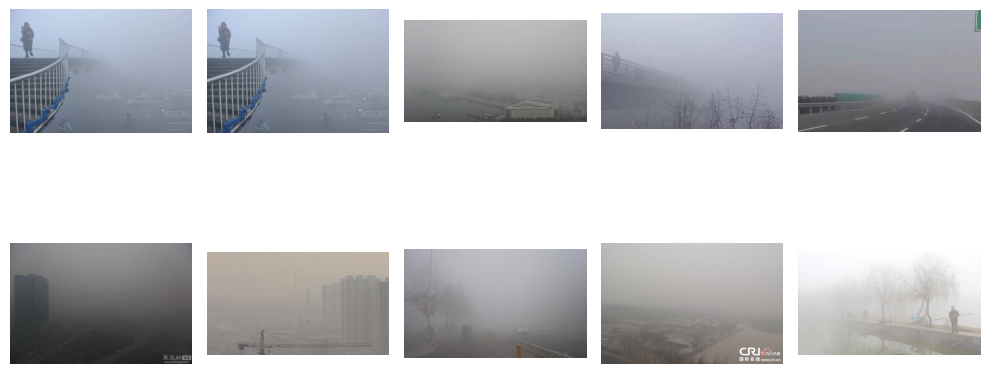

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

top_5_euc = sorted_indices_euc[:10]
#bottom_5_cos = sorted_indices_cos[-10:]
def plot_images(file_paths):
    num_images = len(file_paths)
    num_rows = 2
    num_cols = (num_images + 1) // 2  # Calculate the number of columns based on the number of images

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            try:
                img = mpimg.imread(file_paths[i])
                ax.imshow(img)
                ax.axis('off')
            except IOError:
                print(f"Unable to open image file: {file_paths[i]}")
        else:
            ax.axis('off')  # Hide unused subplot

    plt.tight_layout()
    plt.show()

# Usage example
file_paths = []
for i in top_5_euc:
#for i in bottom_5_cos:
    idx = f"{i:07}_"
    img_path = data.loc[idx]["file_path"]
    file_paths.append(img_path)
    
#file_paths = sorted_indices_euc
plot_images(file_paths)

### MobileNet

In [22]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
base_model = MobileNet(weights='imagenet', include_top=False)

x = base_model.output
embeddings = layers.GlobalAveragePooling2D()(x) # layer before output

model = Model(base_model.input, embeddings)

17225924/17225924 [==============================] - 2s 0us/step


In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, None, None, 512)  4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_pw_9 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_9

In [24]:
# Initialize a list to store the embeddings
filenames = []
embeddings = []

# Process images in batches
batch_size = 100
num_images = len(image_paths)
num_batches = num_images // batch_size

for batch in tqdm_notebook(range(num_batches), desc='get embeddings'):
    start_idx = batch * batch_size
    end_idx = (batch + 1) * batch_size

    batch_images = []

    # Process images in the current batch
    for image_path in image_paths[start_idx:end_idx]:
        filename = os.path.basename(image_path).replace(".jpg", "").replace(".png", "") # extract the filename
        filenames.append(filename)
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        batch_images.append(x)

    # Concatenate images in the batch
    batch_images = np.concatenate(batch_images, axis=0)

    # Extract the embeddings for the batch
    batch_embeddings = model.predict(batch_images)
    batch_embeddings = batch_embeddings.reshape(batch_embeddings.shape[0], -1)

    # Append the embeddings to the list
    embeddings.append(batch_embeddings)

# Concatenate embeddings from all batches
embeddings = np.concatenate(embeddings, axis=0)

# Print the shape of the embeddings array
print(embeddings.shape)

get embeddings:   0%|          | 0/319 [00:00<?, ?it/s]

4/4 [==============================] - 2s 409ms/step


4/4 [==============================] - 2s 361ms/step
(31900, 1024)


In [26]:
embeddings.min(), embeddings.max()

(0.0, 6.0)

In [27]:
embeddings.shape

(31900, 1024)

In [56]:
embeddings = np.array(embeddings)
mn_df = pd.DataFrame(embeddings)
mn_df['id'] = filenames
mn_df['id'].replace(' ', '')
mn_df = mn_df.set_index('id')
mn_df.head()

0         1         2         3         4         5     \
id                                                                     
 000000_  1.702602  0.280345  0.002875  0.392063  0.058732  0.072598   
 000001_  1.082599  0.056388  0.000000  0.305775  0.001646  0.084357   
 000002_  2.344831  0.095258  0.929714  0.007168  0.393723  0.000000   
 000003_  1.923374  0.469801  0.000000  0.000000  0.034059  0.032183   
 000004_  1.212457  0.000000  0.730530  0.260026  0.692328  1.183607   

              6         7         8         9     ...      1014      1015  \
id                                                ...                       
 000000_  0.823098  0.085063  0.271215  0.000000  ...  0.001516  0.000000   
 000001_  0.024238  0.000000  0.245861  2.627593  ...  1.636400  0.074678   
 000002_  1.015506  0.055767  1.104065  0.234005  ...  0.115671  0.005713   
 000003_  0.000000  0.208176  2.159894  0.041754  ...  2.693473  0.074690   
 000004_  0.000000  0.000000  0.023676  1.795062  ...  1.602074  0.009075   

              1016      1017      1018      1019      1020      1021  \
id                                                                     
 000000_  0.916635  0.434451  0.000000  2.207779  0.078891  0.004087   
 000001_  0.247777  0.000000  0.092174  0.165596  6.000000  1.257296   
 000002_  1.477797  1.545036  0.764558  0.961210  0.254579  0.242481   
 000003_  0.710116  0.019694  0.221126  0.000000  5.245052  0.109389   
 000004_  0.021297  0.241891  0.560821  1.275403  0.321218  0.000000   

              1022      1023  
id                            
 000000_  0.022139  0.790070  
 000001_  0.000000  0.559314  
 000002_  0.213318  0.218131  
 000003_  0.000000  0.000000  
 000004_  0.000000  1.439156  

[5 rows x 1024 columns]

In [36]:
# save as csv
#mn_df.to_csv('weather_image_recognition/mobile_net_embeddings.csv')

In [9]:
mn_df = pd.read_csv('weather_image_recognition/mobile_net_embeddings.csv', index_col='id')

In [10]:
mn_df

0         1         2         3         4         5  \
id                                                                     
 000000_  1.702602  0.280345  0.002875  0.392063  0.058732  0.072598   
 000001_  1.082599  0.056388  0.000000  0.305775  0.001646  0.084357   
 000002_  2.344831  0.095258  0.929714  0.007168  0.393723  0.000000   
 000003_  1.923374  0.469801  0.000000  0.000000  0.034059  0.032183   
 000004_  1.212457  0.000000  0.730530  0.260026  0.692328  1.183607   
...            ...       ...       ...       ...       ...       ...   
 031895_  0.023134  0.281513  0.000000  0.000000  0.217412  0.126712   
 031896_  0.034592  1.267419  0.144378  1.280242  0.000000  1.797819   
 031897_  0.900231  0.000000  0.569393  0.366920  0.038952  0.569102   
 031898_  0.273221  0.070047  2.328959  0.300906  1.520213  0.529524   
 031899_  0.551262  0.307694  0.255540  0.494664  0.461467  0.264115   

                 6         7         8         9  ...      1014      1015  \
id                                                ...                       
 000000_  0.823098  0.085063  0.271215  0.000000  ...  0.001516  0.000000   
 000001_  0.024238  0.000000  0.245861  2.627593  ...  1.636400  0.074678   
 000002_  1.015506  0.055767  1.104065  0.234005  ...  0.115671  0.005713   
 000003_  0.000000  0.208176  2.159895  0.041754  ...  2.693473  0.074690   
 000004_  0.000000  0.000000  0.023676  1.795062  ...  1.602074  0.009075   
...            ...       ...       ...       ...  ...       ...       ...   
 031895_  0.475189  0.348990  0.184494  0.251175  ...  0.165004  0.019866   
 031896_  0.182455  0.517896  0.026386  0.000000  ...  1.222156  0.000491   
 031897_  0.540266  0.346402  1.626045  0.052522  ...  1.262984  0.377978   
 031898_  0.807692  0.759143  0.310515  1.481458  ...  0.020165  1.236822   
 031899_  0.260884  1.116551  0.411752  0.928175  ...  0.643531  0.000000   

              1016      1017      1018      1019      1020      1021  \
id                                                                     
 000000_  0.916635  0.434451  0.000000  2.207779  0.078891  0.004087   
 000001_  0.247777  0.000000  0.092174  0.165596  6.000000  1.257296   
 000002_  1.477797  1.545036  0.764558  0.961210  0.254579  0.242481   
 000003_  0.710116  0.019694  0.221126  0.000000  5.245052  0.109389   
 000004_  0.021297  0.241891  0.560821  1.275403  0.321218  0.000000   
...            ...       ...       ...       ...       ...       ...   
 031895_  0.000000  0.875255  0.214930  1.291081  0.918869  0.038446   
 031896_  0.577607  0.000000  0.000000  1.821285  0.019835  1.269431   
 031897_  0.220195  0.000000  0.643493  0.897393  1.749096  1.645923   
 031898_  2.404403  0.213860  0.715240  0.222657  0.232261  0.562310   
 031899_  0.329948  0.000000  0.523096  0.205341  1.692741  0.000000   

              1022      1023  
id                            
 000000_  0.022139  0.790070  
 000001_  0.000000  0.559314  
 000002_  0.213318  0.218131  
 000003_  0.000000  0.000000  
 000004_  0.000000  1.439156  
...            ...       ...  
 031895_  0.349877  0.000000  
 031896_  0.665228  1.495504  
 031897_  0.071168  0.330906  
 031898_  1.251447  1.021582  
 031899_  0.000000  0.134734  

[31900 rows x 1024 columns]

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

arr_euc = np.array([])
for i in range(len(mn_df)):
    v1 = np.array(mn_df.iloc[7352, :])
    v2 = np.array(mn_df.iloc[i, :])
    arr_euc = np.append(arr_euc, distance.euclidean(v1, v2))

sorted_indices_euc = np.argsort(arr_euc)
print(sorted_indices_euc[:6])

[ 7352 10108 30019 10120 19205 11747]


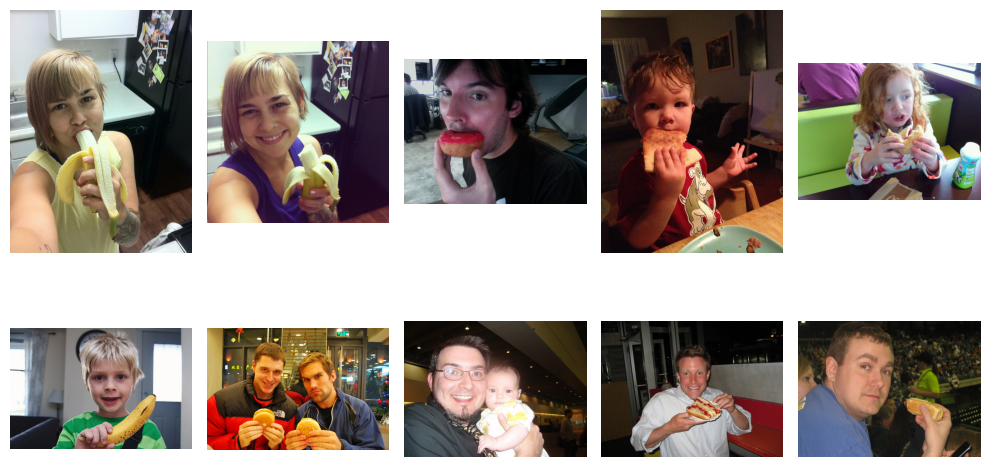

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

top_5_euc = sorted_indices_euc[:10]
#bottom_5_cos = sorted_indices_cos[-10:]
def plot_images(file_paths):
    num_images = len(file_paths)
    num_rows = 2
    num_cols = (num_images + 1) // 2  # Calculate the number of columns based on the number of images

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            try:
                img = mpimg.imread(file_paths[i])
                ax.imshow(img)
                ax.axis('off')
            except IOError:
                print(f"Unable to open image file: {file_paths[i]}")
        else:
            ax.axis('off')  # Hide unused subplot

    plt.tight_layout()
    plt.show()

# Usage example
file_paths = []
for i in top_5_euc:
#for i in bottom_5_cos:
    idx = f"{i:07}_"
    img_path = data.loc[idx]["file_path"]
    file_paths.append(img_path)
    
#file_paths = sorted_indices_euc
plot_images(file_paths)

#### conclusion:
mobilenet perform better than resnet

In [25]:
data['class_'] = data['file_path'].str.split('\\').str[-2]

In [28]:
list(set(data.class_))

['dew',
 'rime',
 'sandstorm',
 'frost',
 'rain',
 'lightning',
 'glaze',
 'snow',
 'unlabeled2017',
 'rainbow',
 'hail',
 'fogsmog']

In [29]:
# convert class name to number for tsne plot
class_mapping = dict()
counter = 0
for item in list(set(data.class_)):
    class_mapping[item] = counter
    counter += 1

class_mapping

{'dew': 0,
 'rime': 1,
 'sandstorm': 2,
 'frost': 3,
 'rain': 4,
 'lightning': 5,
 'glaze': 6,
 'snow': 7,
 'unlabeled2017': 8,
 'rainbow': 9,
 'hail': 10,
 'fogsmog': 11}

In [30]:
data['class_num'] = data['class_'].map(class_mapping)

In [31]:
data.head()

0             1             2         3         4  \
image_id                                                                 
000000_   1.000000e+00  8.741844e-02  7.034527e-01  0.011057  0.052840   
000001_  -1.455192e-11 -1.637090e-11 -1.045919e-11  0.002393  0.005573   
000002_   1.448514e-01  6.331907e-04  1.521892e-02  0.830019  0.188652   
000003_   0.000000e+00  6.572029e-05  0.000000e+00  0.004035  0.008215   
000004_   1.967518e-03  0.000000e+00  0.000000e+00  0.002468  0.000000   

                 5         6         7         8         9  ...            83  \
image_id                                                    ...                 
000000_   0.601915  0.003207  0.083466  0.649100  0.002313  ... -1.437002e-10   
000001_   0.001429  0.007051  0.017359  0.005110  0.021533  ...  4.125379e-01   
000002_   0.400394  1.000000  0.317324  1.000000  0.488636  ...  1.830213e-04   
000003_   0.003885  0.026543  0.050210  0.028661  0.162033  ...  4.267244e-03   
000004_   0.000074  0.002504  0.000000  0.000628  0.007691  ...  1.403405e-03   

                84            85        86        87        88        89  \
image_id                                                                   
000000_   0.000104  5.275069e-11  0.001708  0.001584  0.028443  0.021604   
000001_   0.542714  8.710924e-01  0.555396  1.000000  1.000000  1.000000   
000002_   0.000039  3.637979e-12  0.000070  0.000039  0.000134  0.000000   
000003_   0.002207  1.182965e-03  0.001465  0.001135  0.000000  0.000764   
000004_   0.003470  4.596427e-03  0.001108  0.000000  0.002347  0.000222   

                                                  file_path  class_  class_num  
image_id                                                                        
000000_   C:\Users\Asus\Desktop\Project\ImageRecommender...     dew          0  
000001_   C:\Users\Asus\Desktop\Project\ImageRecommender...     dew          0  
000002_   C:\Users\Asus\Desktop\Project\ImageRecommender...     dew          0  
000003_   C:\Users\Asus\Desktop\Project\ImageRecommender...     dew          0  
000004_   C:\Users\Asus\Desktop\Project\ImageRecommender...     dew          0  

[5 rows x 93 columns]

In [68]:
from sklearn.decomposition import PCA

# Apply PCA to the dataset
pca = PCA(n_components=100)
X_pca = pca.fit_transform(mn_df)

In [69]:
X_pca

array([[-0.42542794, -4.881626  , -3.179783  , ...,  0.18605635,
         2.800271  ,  0.7912471 ],
       [ 3.0076199 , -8.673411  , -2.7633815 , ...,  1.7472354 ,
        -0.2997383 ,  1.0222057 ],
       [ 1.3123186 , -6.076389  , -5.017827  , ..., -1.4408553 ,
         0.274941  , -0.8636524 ],
       ...,
       [-1.8195292 ,  0.5946681 , -5.467908  , ..., -0.31867528,
         0.5263202 ,  1.5532429 ],
       [-2.2561655 , -1.8325082 ,  1.1818237 , ...,  0.3442726 ,
        -0.21795137, -1.8595775 ],
       [-6.9269342 , -0.60862195, -3.0647202 , ...,  0.3960053 ,
        -1.2072805 , -1.5504514 ]], dtype=float32)

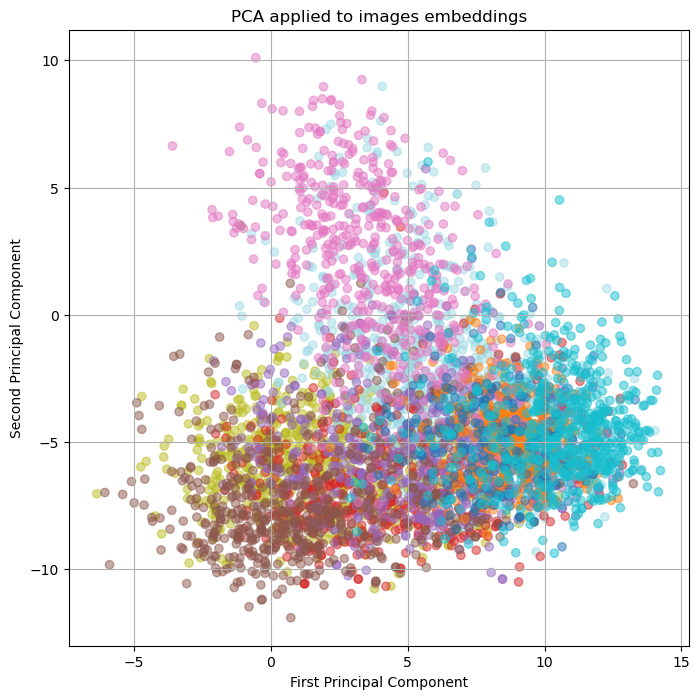

In [201]:
# Visualize the data according to the PCA1 and 2 dimensions
num_dots = 5000

# Visualize the PCA results
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_pca[:num_dots, 0],
           X_pca[:num_dots, 1], c=data.class_num.values[:num_dots],
           cmap='tab20', alpha=0.5)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA applied to images embeddings")
plt.grid(True)
plt.show()

In [20]:
from sklearn.manifold import TSNE
# Apply t-SNE to the dataset
tsne = TSNE(n_components=2, init="pca",
            perplexity=30,
            random_state=42)
X_tsne = tsne.fit_transform(mn_df)

In [21]:
X_tsne

array([[ 11.407066, -69.76429 ],
       [ 25.54533 , -35.52865 ],
       [ 16.684835, -66.076324],
       ...,
       [ -9.826782,  38.470776],
       [-68.116295, -29.887346],
       [-38.868748,  10.91163 ]], dtype=float32)

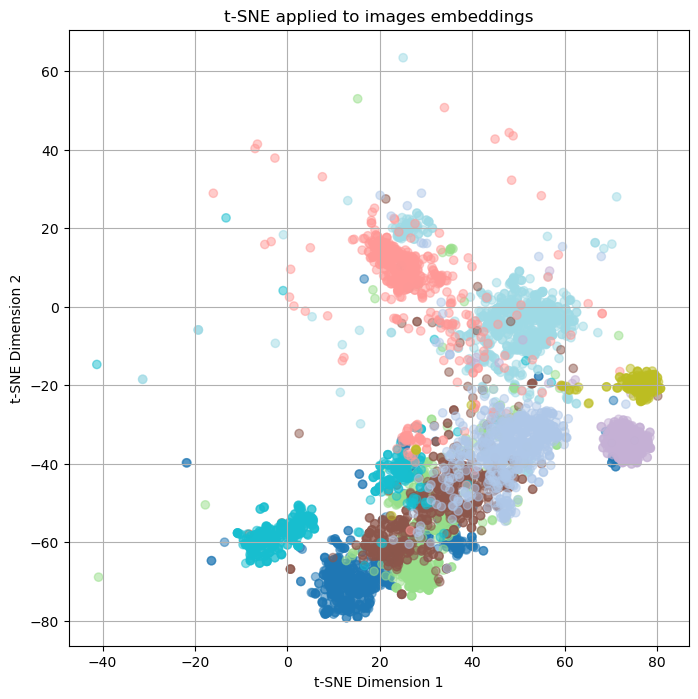

In [34]:
# Visualize the t-SNE results
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_tsne[:5000, 0], X_tsne[:5000, 1],
           c=data.class_num.values[:5000], #loss last 32 images
           cmap='tab20', alpha=0.5)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE applied to images embeddings")
plt.grid(True)
plt.show()

In [35]:
import plotly.express as px

fig = px.scatter(
    X_tsne, x=0, y=1,
    color=data.class_[:31900], labels={'color': 'class_'},
    opacity=0.5
)
fig.show()

# draft area

In [53]:
# Counter for unique image names
image_counter = 0

# creating the generator
def reader(filepath, rename=False):
    '''
    This function generates through all the images file in the folder
    ''' 
    current_path = filepath 
    print(current_path)
    
    global image_counter  
    
    for foldername in os.listdir(current_path):
        folderpath = os.path.join(filepath, foldername)
        current_path = folderpath
        
        if os.path.isdir(folderpath) and not foldername.startswith('.'):
            os.chdir(folderpath)
            print(folderpath)
            
            for file in os.listdir(folderpath):
                if file.endswith(".jpg") or file.endswith(".png"): 
                    with open(os.path.join(folderpath, file), "rb") as f:
                        image = f.read()
                        img = cv2.imread(file)
                    
                    # check if image can be loaded correctly
                    if img is not None:   
                        # yield tuple, so later we need to use
                        yield (img, os.path.join(folderpath, file))
                        
                    else:
                        # check path or image format
                        print(f"Error while loading image: {file}")
            
            os.chdir('..')

In [153]:
filepath = os.path.join(os.getcwd(), "test")
gen = reader(filepath)

In [160]:
# Define the path to the original image
image_path = os.path.join(filepath, 't1/1_.jpg')

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Extract the image embedding
embedding = model.predict(x)

# Flatten the embedding to a 1D array
embedding = embedding.flatten()

# Print the shape of the embedding
print(embedding.shape)

1/1 [==============================] - 0s 499ms/step
(2048,)


In [158]:
embedding

array([[7.4940963 , 0.1771382 , 0.11501522, ..., 0.4280081 , 0.80446166,
        1.7910606 ]], dtype=float32)

In [161]:
#import glob

# Define the path to the directory containing the images
#image_directory = 'path/to/images/'

# Get a list of image file paths
#image_paths = glob.glob(image_directory + '*.jpg')
filepath = os.path.join(os.getcwd(), "weather_image_recognition")
gen = reader(filepath)


# Initialize a list to store the embeddings
filenames = []
embeddings = []

# Process each image
for img, image_path in tqdm_notebook(gen, desc='get embeddings'):
    # Get the filename
    file_name = os.path.basename(image_path).replace(".jpg", "").replace(".png", "") # extract the filename
    
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # add extra dimension (1) for batch size
    x = preprocess_input(x)

    # Extract the image embedding
    embedding = model.predict(x)

    # Flatten the embedding to a 1D array
    embedding = embedding.flatten()

    # Append the embedding to the list
    embeddings.append(embedding)
    
    # Append the filename
    filenames.append(file_name)

# Convert the list of embeddings to a NumPy array
embeddings = np.array(embeddings)

# Print the shape of the embeddings array
print(embeddings.shape)


get embeddings: 0it [00:00, ?it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition
C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\dew
1/1 [==============================] - 1s 516ms/step


1/1 [==============================] - 1s 521ms/step


1/1 [==============================] - 1s 564ms/step
C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\fogsmog
1/1 [==============================] - 1s 533ms/step


1/1 [==============================] - 1s 674ms/step


KeyboardInterrupt: 

In [226]:
embeddings = np.array(embeddings)
df = pd.DataFrame(embeddings)
df['id'] = filenames
df['id'].replace(' ', '')
df = df.set_index('id')
df.head()

0         1         2         3         4         5     \
id                                                                     
 000000_  6.862374  0.699451  0.427140  0.006834  0.104121  0.309327   
 000001_  0.244853  2.544216  0.000000  0.298929  1.176665  0.056427   
 000002_  5.671950  0.085187  0.852656  0.327039  0.000000  0.000000   
 000003_  2.670874  0.000000  0.000000  0.000000  0.000000  0.000000   
 000004_  4.802979  0.000000  0.764017  0.162811  0.000000  0.000000   

              6         7         8         9     ...      2038      2039  \
id                                                ...                       
 000000_  0.075689  0.686164  0.036264  0.000000  ...  0.058936  0.000000   
 000001_  0.006840  0.000000  0.000000  1.546012  ...  0.118142  0.429420   
 000002_  0.000580  0.000000  0.371360  0.000000  ...  0.000000  0.002479   
 000003_  0.062148  0.000000  0.010454  0.371723  ...  0.000000  0.068883   
 000004_  0.030078  0.005119  0.000000  0.004073  ...  0.014523  0.000000   

              2040      2041      2042      2043      2044      2045  \
id                                                                     
 000000_  0.979317  0.000000  0.029853  0.018639  0.030241  0.232394   
 000001_  0.552497  0.000000  0.000000  0.012463  0.000000  0.000000   
 000002_  0.000000  0.132498  0.251379  0.000000  0.295880  0.098552   
 000003_  0.213882  0.000000  0.000000  0.000000  0.000000  0.007898   
 000004_  0.017444  0.041316  0.000000  0.028519  0.059754  2.096421   

              2046      2047  
id                            
 000000_  0.310612  1.470915  
 000001_  0.127913  0.368000  
 000002_  0.108324  1.189066  
 000003_  0.005712  0.000000  
 000004_  0.039790  1.758875  

[5 rows x 2048 columns]